# Exploratory analysis

In [2]:
# Importing all the necessary packages and libraries

import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting

In [3]:
spotify = pd.read_csv("../dataset/songs_updated_v4.csv") # Using pandas lib to read table
spotify.head() # Checking data schema for validation purpose

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,is_folk_acoustic,is_r&b,is_latin,is_dance_electronic,is_easy_listening,is_metal,is_classical,is_blues,is_world_traditional,has_feature
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,False,False,False,False,False,False,False,False,False,False
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,False,False,False,False,False,False,False,False,False,False
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,False,False,False,False,False,False,False,False,False,False
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,False,False,False,False,False,True,False,False,False,False
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,False,False,False,False,False,False,False,False,False,False


1. Checking if same song and artist pair exists

In [83]:
#Cloning DF to avoid tampering
spotify_unique=spotify
# Added a new column by collating Artist and Song columns to check if any instances where singer with same name occuring more than once or not
spotify_unique["artist_song"] = spotify_unique["artist"].map(str) + " - " + spotify_unique["song"].map(str)
print(spotify_unique["artist_song"])

0                 Britney Spears - Oops!...I Did It Again
1                        blink-182 - All The Small Things
2                                    Faith Hill - Breathe
3                                 Bon Jovi - It's My Life
4                                    *NSYNC - Bye Bye Bye
                              ...                        
1914                              Jonas Brothers - Sucker
1915                          Taylor Swift - Cruel Summer
1916                            Blanco Brown - The Git Up
1917    Sam Smith - Dancing With A Stranger (with Norm...
1918                                Post Malone - Circles
Name: artist_song, Length: 1919, dtype: object


In [5]:
#Grouping by the newly generated column "artist_song" to check duplicacies in same artist-song
spotify_anom = spotify_unique.groupby("artist_song").count().sort_values(by = "artist", ascending=False)
spotify_anom

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,pop,folk_acoustic,dance_electronic,r&b,classical,blues,latin,easy_listening,country,hasFeature
artist_song,,,,,,,,,,,,,,,,,,,,,
Taylor Swift - Bad Blood,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Cardi B - Bodak Yellow,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Selena Gomez - The Heart Wants What It Wants,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Waka Flocka Flame - No Hands (feat. Roscoe Dash & Wale),2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Alessia Cara - Here,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Eric Prydz - Pjanoo - Radio Edit,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Eric Prydz - Call on Me - Radio Mix,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Enya - Only Time,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [84]:
# Creating object consisting of only more than once instances

anom_cases = spotify_anom.query("artist > 1")
print("Songs from same singer repeating more than once: ",len(anom_cases))
anom_cases

Songs from same singer repeating more than once:  15


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,pop,folk_acoustic,dance_electronic,r&b,classical,blues,latin,easy_listening,country,hasFeature
artist_song,,,,,,,,,,,,,,,,,,,,,
Taylor Swift - Bad Blood,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Cardi B - Bodak Yellow,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Selena Gomez - The Heart Wants What It Wants,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Waka Flocka Flame - No Hands (feat. Roscoe Dash & Wale),2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Alessia Cara - Here,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Kygo - Stole the Show,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Lorde - Team,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Drake - Hotline Bling,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Drake - Jumpman,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


Why these songs are repeated? Does their data differ?

In [85]:
anom_df = pd.DataFrame((anom_cases.index))
anom_deep_dive = spotify_unique.loc[spotify_unique["artist_song"].isin(anom_df["artist_song"])].sort_values(by = "song", ascending = True)
anom_deep_dive

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,folk_acoustic,dance_electronic,r&b,classical,blues,latin,easy_listening,country,hasFeature,artist_song
1453,Taylor Swift,Bad Blood,200106,False,2015,70,0.654,0.655,11,-7.388,...,False,False,False,False,False,False,False,False,False,Taylor Swift - Bad Blood
1361,Taylor Swift,Bad Blood,211933,False,2014,54,0.646,0.794,7,-6.104,...,False,False,False,False,False,False,False,False,False,Taylor Swift - Bad Blood
1778,Cardi B,Bodak Yellow,223712,True,2018,72,0.926,0.703,11,-6.337,...,False,False,False,False,False,False,False,False,False,Cardi B - Bodak Yellow
1691,Cardi B,Bodak Yellow,223962,True,2017,59,0.929,0.723,11,-5.792,...,False,False,False,False,False,False,False,False,False,Cardi B - Bodak Yellow
1609,Jonas Blue,Fast Car,212424,False,2015,1,0.459,0.587,9,-6.983,...,False,True,False,False,False,False,False,False,False,Jonas Blue - Fast Car
1522,Jonas Blue,Fast Car,212424,False,2015,67,0.644,0.570,9,-6.994,...,False,True,False,False,False,False,False,False,False,Jonas Blue - Fast Car
172,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,162333,False,2002,46,0.836,0.762,7,-5.044,...,False,False,False,False,False,False,False,False,False,Daniel Bedingfield - Gotta Get Thru This - D'N...
261,Daniel Bedingfield,Gotta Get Thru This - D'N'D Radio Edit,161240,False,2002,56,0.838,0.764,7,-5.076,...,False,False,False,False,False,False,False,False,False,Daniel Bedingfield - Gotta Get Thru This - D'N...
1505,Alessia Cara,Here,199453,False,2015,0,0.379,0.799,0,-4.031,...,False,False,True,False,False,False,False,False,False,Alessia Cara - Here
1596,Alessia Cara,Here,199453,False,2016,66,0.376,0.822,0,-3.974,...,False,False,True,False,False,False,False,False,False,Alessia Cara - Here


These are the cases where similar song from same singer has been repeated. These entries can be both original and remix / modfied songs released in the same year or in different years
There are also some cases where there is a difference in duration or loudness or other similar musical/sound parameters which provides more conclusive evidence that this data entries are not errors rather released in same time frame with song modication or totally in two different periods

In [86]:
# Plotly Express in Python: https://plotly.com/python/plotly-express/
import plotly.express as px

1. How many songs in each genre

In [87]:
fig=px.histogram(spotify_unique.groupby('genre',as_index=False).count().sort_values(by='song',ascending=False),x='genre',y='song',color_discrete_sequence=['green'],template='plotly_dark',marginal='box',title='<b>Total songs based on genres</b>')
fig.update_layout(title_x=0.5)

2. Number of Songs per year

In [23]:
year_distr = spotify_unique.groupby("year").size().sort_values(ascending=False).reset_index(name='count') 
year_distr

,year,count
0,2012,111
1,2017,110
2,2001,106
3,2018,103
4,2010,103
5,2005,100
6,2016,97
7,2014,97
8,2011,95
9,2015,93


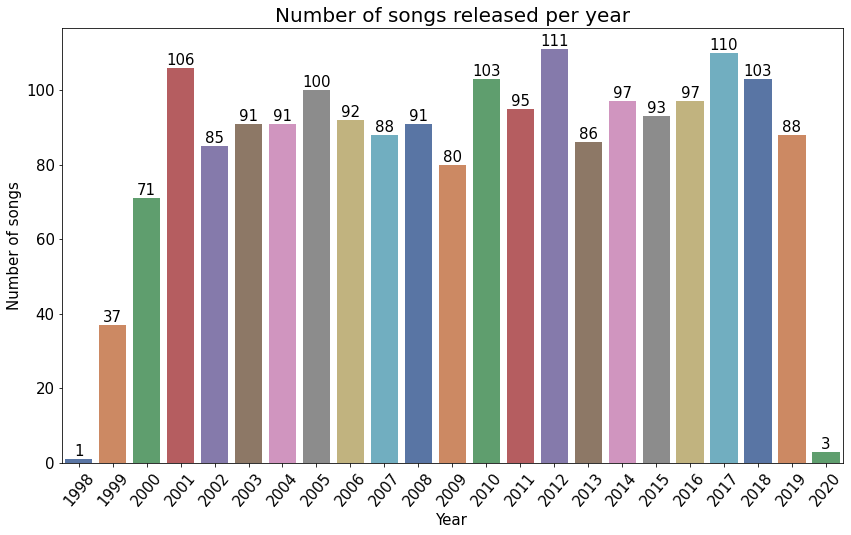

In [10]:
# Organizing the number of songs released per year
songs_per_year = (spotify_unique.year.value_counts().rename_axis('year').reset_index(name = 'songs'))

# Plotting songs_per_year in a bar chart
plt.figure(figsize=(14,8))
ax = sns.barplot(x = 'year', y = 'songs', data = songs_per_year,palette='deep')
plt.ylabel('Number of songs', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Number of songs released per year', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
ax.bar_label(ax.containers[0],size = 15)
plt.show()

2. Which artist has highest popularity

In [14]:
# Organizing the ten most popular artists according to popularity score
top_10_artists = spotify_unique.groupby('artist')[['artist','popularity']].sum().sort_values('popularity',
                                                               ascending=False).head(10)
top_10_artists

,popularity
artist,
Rihanna,1662
Eminem,1519
Drake,1424
Calvin Harris,1356
Britney Spears,1198
David Guetta,1185
Taylor Swift,1125
Katy Perry,1033
Beyoncé,1030


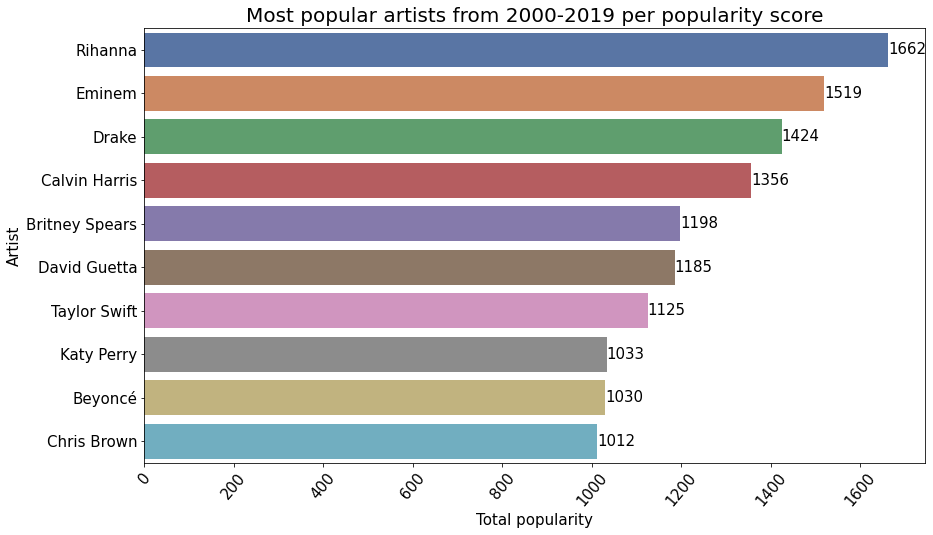

In [22]:
# Visualizing most popular artists
plt.figure(figsize=(14,8))
ax = sns.barplot(data = top_10_artists, x = 'popularity', y = top_10_artists.index ,palette='deep')
plt.ylabel('Artist', size = 15)
plt.xlabel('Total popularity', size = 15)
plt.title('Most popular artists from 2000-2019 per popularity score', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
ax.bar_label(ax.containers[0],size = 15)
plt.show()

[Text(0.5, 1.0, 'Popularity Histogram'), Text(0.5, 0, 'Popularity Ratings'), Text(0, 0.5, 'Frequency')]


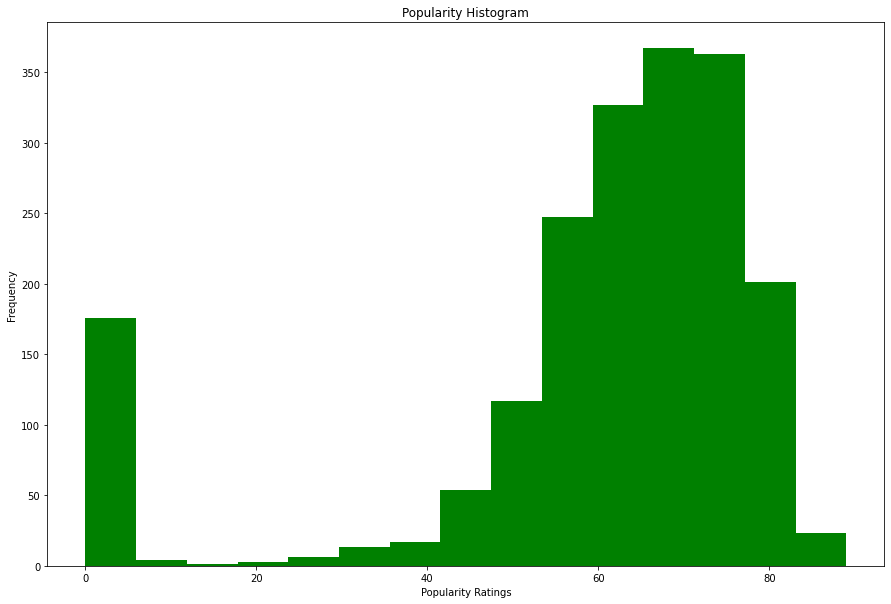

In [35]:
#Exploratory analysis 1
import matplotlib.pyplot as plt
myFig = plt.figure(figsize=(15,10))
histogram = plt.hist(spotify_unique['popularity'], bins=15, color='g')
histogram = plt.gca().set(title="Popularity Histogram", xlabel="Popularity Ratings", ylabel="Frequency")
print(histogram)

In [36]:
mean = spotify_unique.popularity.mean()
print(mean)

59.658155289213134


In [39]:
frame=spotify_unique
frame.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'world_traditional', 'jazz', 'hip_hop', 'metal', 'rock', 'pop',
       'folk_acoustic', 'dance_electronic', 'r&b', 'classical', 'blues',
       'latin', 'easy_listening', 'country', 'hasFeature', 'artist_song'],
      dtype='object')

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

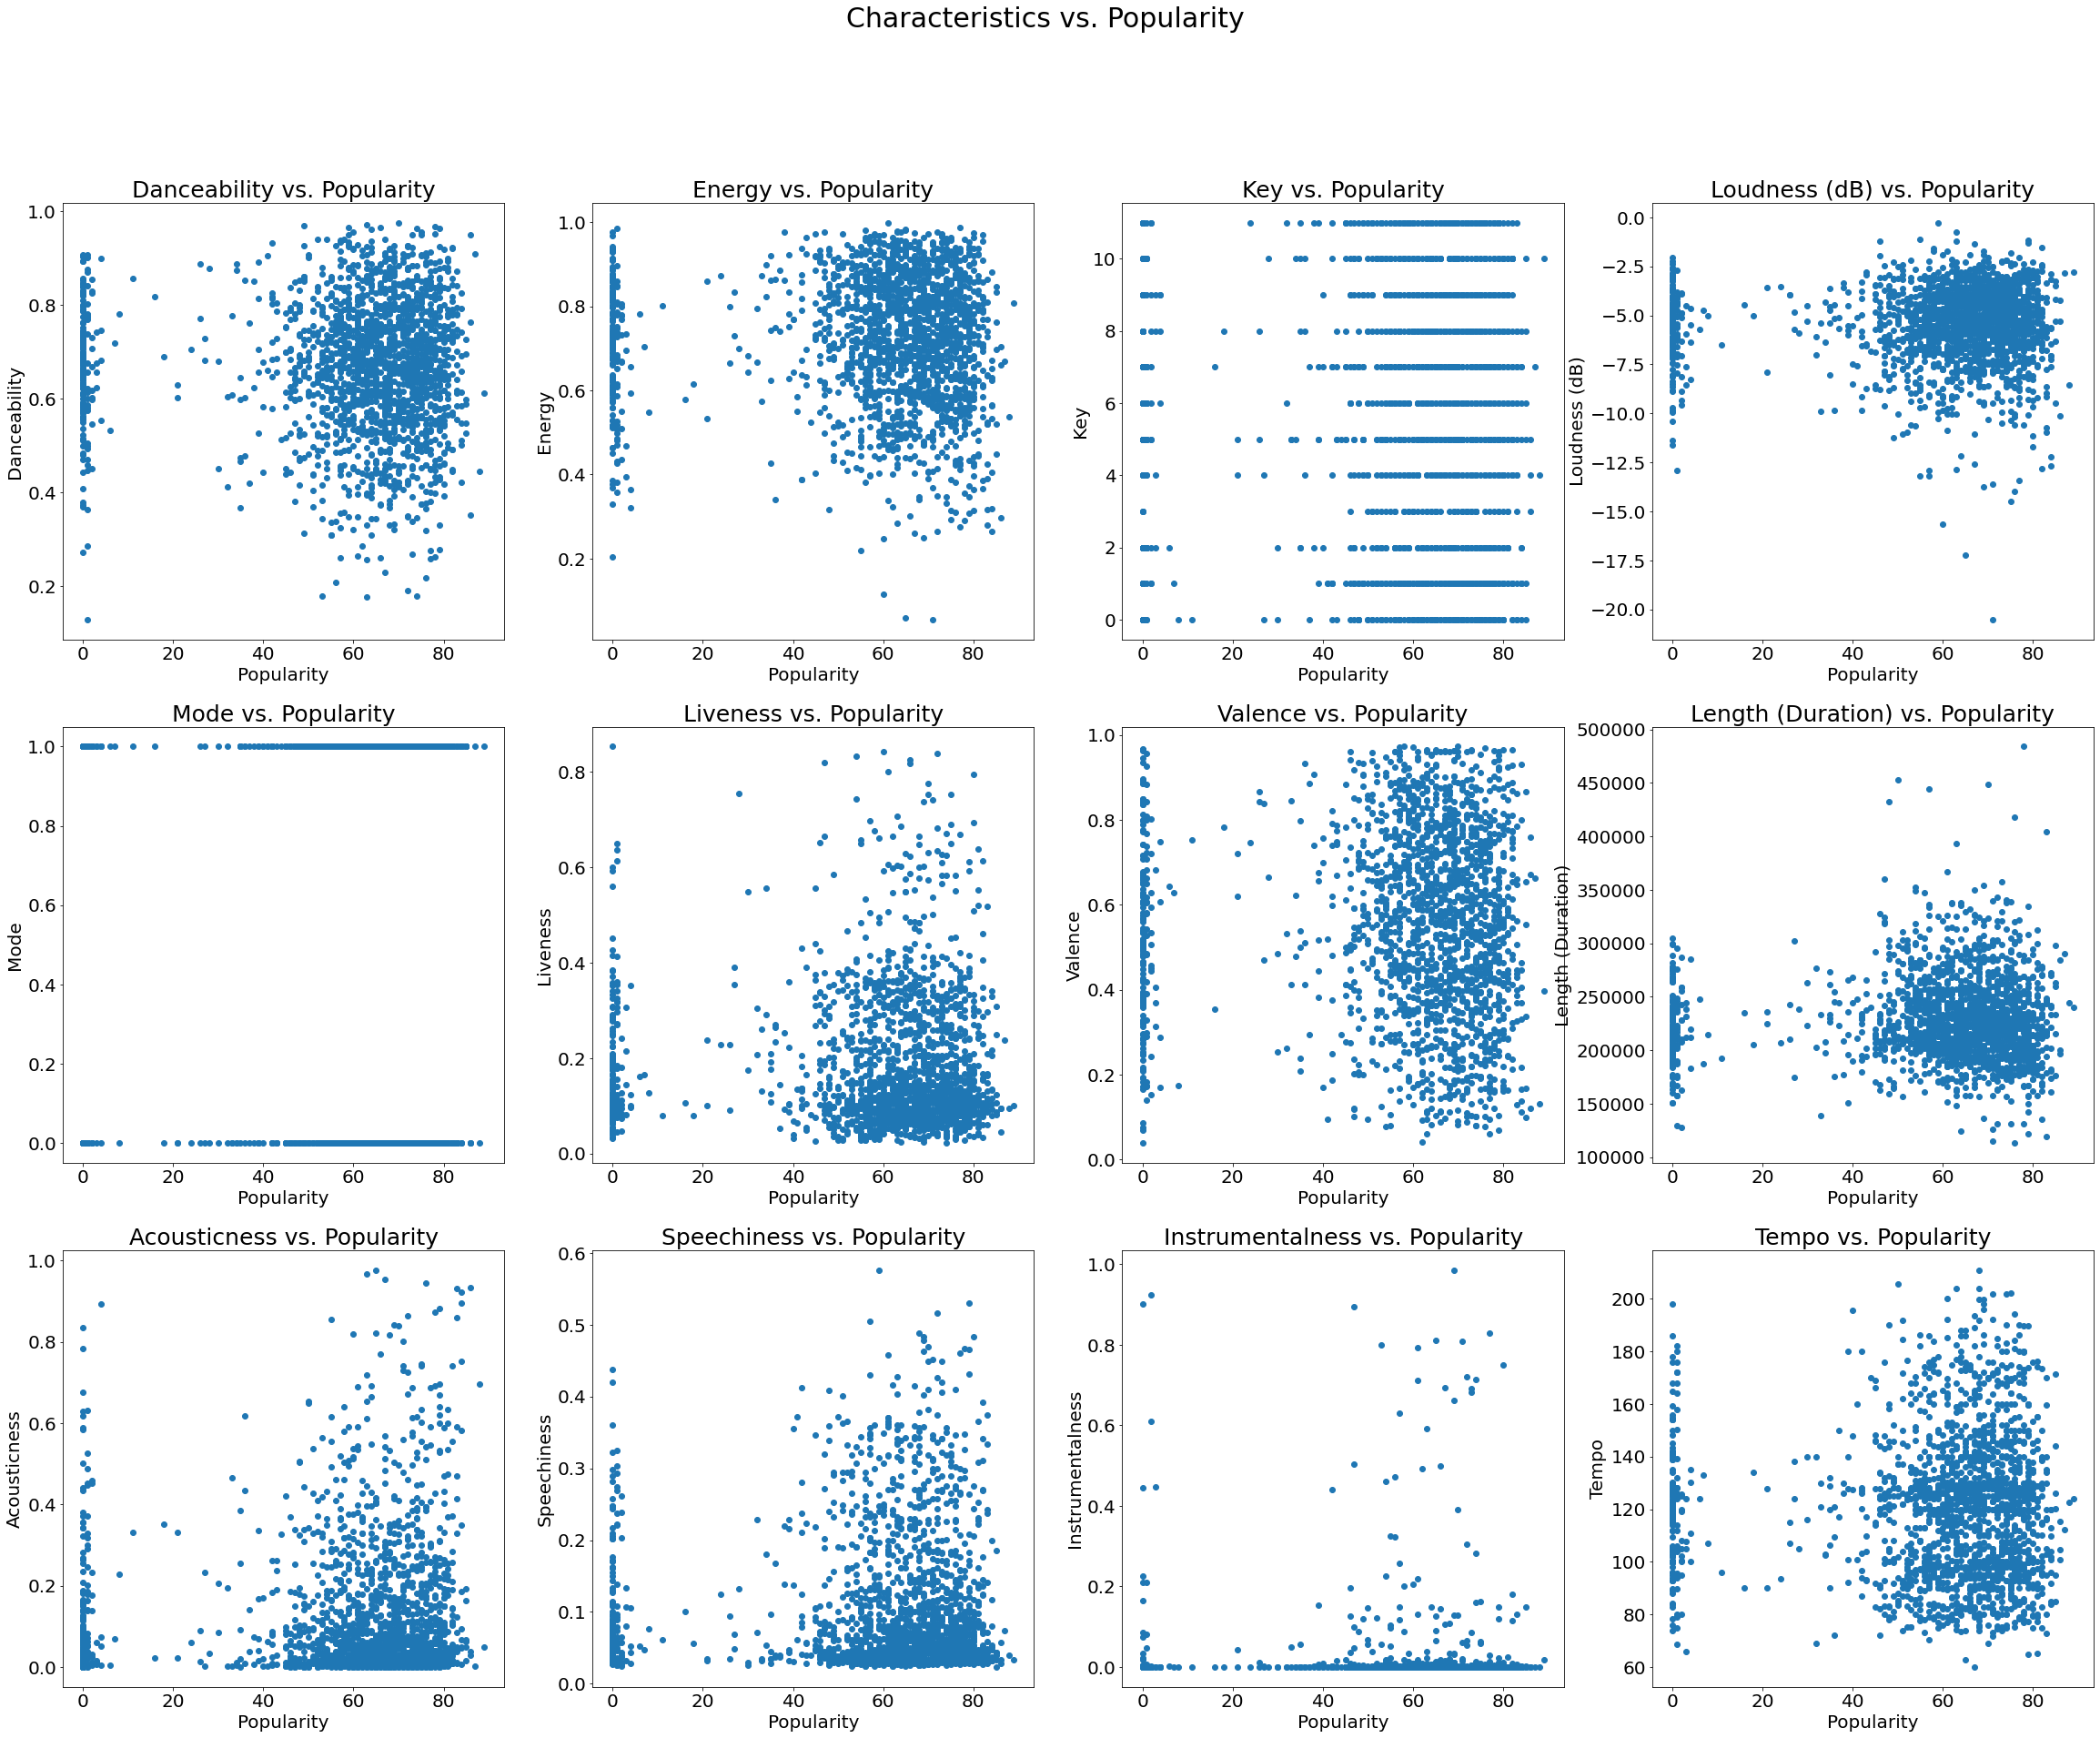

In [58]:
# Exploratory analysis 2
fig1 = plt.figure(figsize=(40, 30))
fig1.suptitle("Characteristics vs. Popularity", fontsize=30)
plt.subplot(3,4,1)
plt.subplot(3,4,1).set_title("Danceability vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["danceability"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Danceability", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,2)
plt.subplot(3,4,2).set_title("Energy vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["energy"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,3)
plt.subplot(3,4,3).set_title("Key vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["key"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Key", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,4)
plt.subplot(3,4,4).set_title("Loudness (dB) vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["loudness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Loudness (dB)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,5)
plt.subplot(3,4,5).set_title("Mode vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["mode"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Mode", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,6)
plt.subplot(3,4,6).set_title("Liveness vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["liveness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Liveness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,7)
plt.subplot(3,4,7).set_title("Valence vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["valence"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Valence", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,8)
plt.subplot(3,4,8).set_title("Length (Duration) vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["duration_ms"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Length (Duration)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,9)
plt.subplot(3,4,9).set_title("Acousticness vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["acousticness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Acousticness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,10)
plt.subplot(3,4,10).set_title("Speechiness vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["speechiness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Speechiness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,11)
plt.subplot(3,4,11).set_title("Instrumentalness vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["instrumentalness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Instrumentalness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(3,4,12)
plt.subplot(3,4,12).set_title("Tempo vs. Popularity", fontsize=25)
plt.scatter(frame["popularity"], frame["tempo"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Tempo", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [78]:
#find co-relation between columns
df_new = frame[['duration_ms', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_new.corr()
#frame.corrwith(df_new)

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.044512,-0.058133,-0.079727,-0.006455,-0.084822,-0.004058,0.064292,0.008331,-0.002110,0.023200,-0.114559,-0.031100
popularity,0.044512,1.000000,0.000867,-0.012911,0.014053,0.030560,-0.019890,0.021691,0.022864,-0.045916,-0.010644,-0.011251,0.011247
danceability,-0.058133,0.000867,1.000000,-0.102425,0.037215,-0.032444,-0.070916,0.143658,-0.068554,0.022254,-0.127752,0.401737,-0.170906
energy,-0.079727,-0.012911,-0.102425,1.000000,-0.000729,0.653256,-0.043319,-0.060615,-0.445897,0.036084,0.154419,0.331999,0.147860
key,-0.006455,0.014053,0.037215,-0.000729,1.000000,-0.003219,-0.150457,0.002033,-0.002283,-0.000652,-0.040784,0.036744,-0.009689
loudness,-0.084822,0.030560,-0.032444,0.653256,-0.003219,1.000000,-0.026285,-0.084307,-0.311673,-0.108033,0.099469,0.231422,0.080884
mode,-0.004058,-0.019890,-0.070916,-0.043319,-0.150457,-0.026285,1.000000,0.001753,0.009006,-0.032162,0.026382,-0.081330,0.045968
speechiness,0.064292,0.021691,0.143658,-0.060615,0.002033,-0.084307,0.001753,1.000000,0.006201,-0.060857,0.054046,0.071062,0.061481
acousticness,0.008331,0.022864,-0.068554,-0.445897,-0.002283,-0.311673,0.009006,0.006201,1.000000,0.000525,-0.106997,-0.129348,-0.101801
instrumentalness,-0.002110,-0.045916,0.022254,0.036084,-0.000652,-0.108033,-0.032162,-0.060857,0.000525,1.000000,-0.032276,-0.015072,0.034659


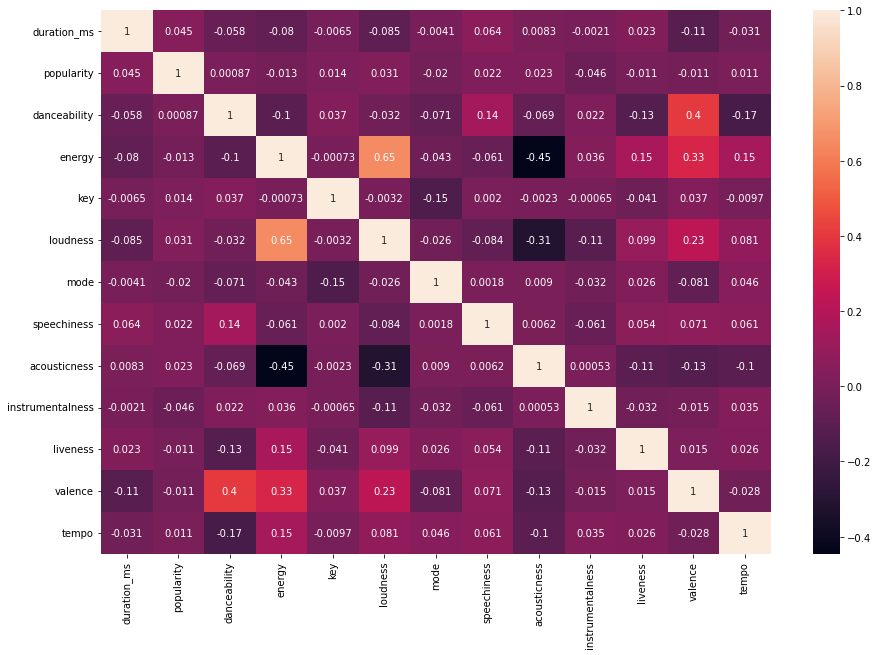

In [79]:
import matplotlib.pyplot as plt
import seaborn as sn
myFig = plt.figure(figsize=(15, 10))
df = pd.DataFrame(frame, columns=["duration_ms","popularity",
       "danceability", "energy", "key", "loudness", "mode", "speechiness",
       "acousticness", "instrumentalness", "liveness", "valence", "tempo"])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

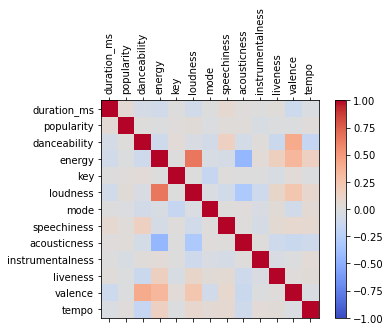

In [77]:
#The “corr()” method evaluates the correlation between all the features, then it can be graphed with a color coding
corr = df_new.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_new.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_new.columns)
ax.set_yticklabels(df_new.columns)
plt.show()

In [7]:
spotify.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre', 'is_jazz', 'is_country', 'is_rock', 'is_pop', 'is_hip_hop',
       'is_folk_acoustic', 'is_r&b', 'is_latin', 'is_dance_electronic',
       'is_easy_listening', 'is_metal', 'is_classical', 'is_blues',
       'is_world_traditional', 'has_feature'],
      dtype='object')

In [9]:
year_average = spotify[["tempo", "energy", "danceability", 
                      "loudness", "liveness", "valence", "duration_ms", 
                      "acousticness", "speechiness", "popularity", "year"]].groupby('year').mean().sort_values(by="year", ascending=True).reset_index()
print(year_average)

    year       tempo    energy  danceability   loudness  liveness   valence  \
0   1998   81.125000  0.445000      0.727000 -11.241000  0.180000  0.527000   
1   1999  122.705000  0.738421      0.668974  -5.936816  0.165600  0.574008   
2   2000  112.660873  0.747901      0.690817  -6.174732  0.183014  0.649183   
3   2001  117.414877  0.728086      0.674698  -5.864962  0.174502  0.658815   
4   2002  113.447093  0.724512      0.674128  -5.438128  0.190012  0.582988   
5   2003  119.410374  0.706473      0.666033  -5.811681  0.164974  0.613751   
6   2004  115.007484  0.735821      0.694779  -5.248463  0.180473  0.608175   
7   2005  119.289911  0.702584      0.674020  -5.920297  0.186088  0.554990   
8   2006  113.865452  0.704785      0.663462  -5.687441  0.193313  0.601516   
9   2007  120.711800  0.765489      0.626589  -5.072011  0.187292  0.549077   
10  2008  125.714560  0.754593      0.667505  -5.171901  0.173365  0.560643   
11  2009  125.218402  0.753402      0.623915  -5.000